<a href="https://colab.research.google.com/github/Mohdwajtech/linear_regression/blob/master/Lin_Reg_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 1
### LINEAR REGRESSION - Introduction

### Regression
**Objective** To understand simple linear regression models. 

We start by plotting some experimental data and explore the simplest line we can fit. We implement the Gradient Descent method to find the best such line and see how the method successively approximates that line. We also explore what happens when there is some noise/error in the data.

**Expected Time:** This Experiment should take around 15 mins

In [ ]:
# The below are wrapper functions used to connect to your drive and this needs to be run once (i.e. once every new session or possibily refreshes for every 24 hours)

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Authentication for your google drive
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

# Authentication for the wrapper libraries  or possibily refreshes for every 24 hours)

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive

In [ ]:
%cd MyDrive/AIML Labs/Session05

/content/MyDrive/AIML Labs/Session05


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['x', 'y'])
print(data.head())
print(data.tail())

      x        y
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       x       y
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [ ]:
x = data['x'].values
y = data['y'].values

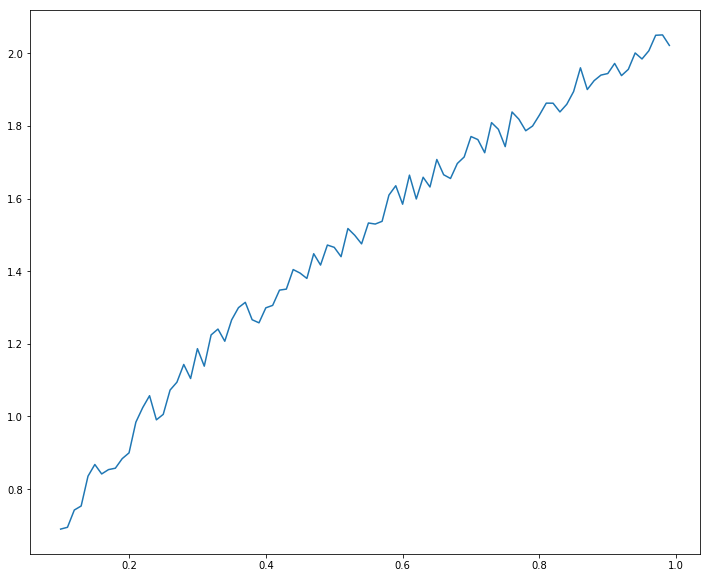

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

That does not look too much of a straightline; it may be easier to see if we only plot the points rather than poltting the line that is obtained by connecting th e points in the order of their occurrence.

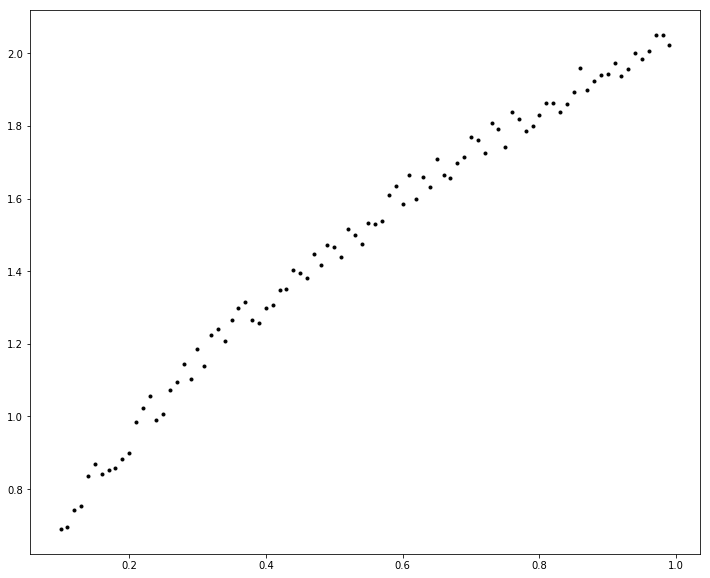

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(x, y, '.k')
#plt.plot(x, y)
plt.show()

This still is not too much like a straightline. That is because it is not one actually! From the domain we know that actually $x$ $\propto$ $y^2$. We will tell you how, soon!

So let us instead plot $y^2$ vs $x$:

In [ ]:
Y = y ** 2

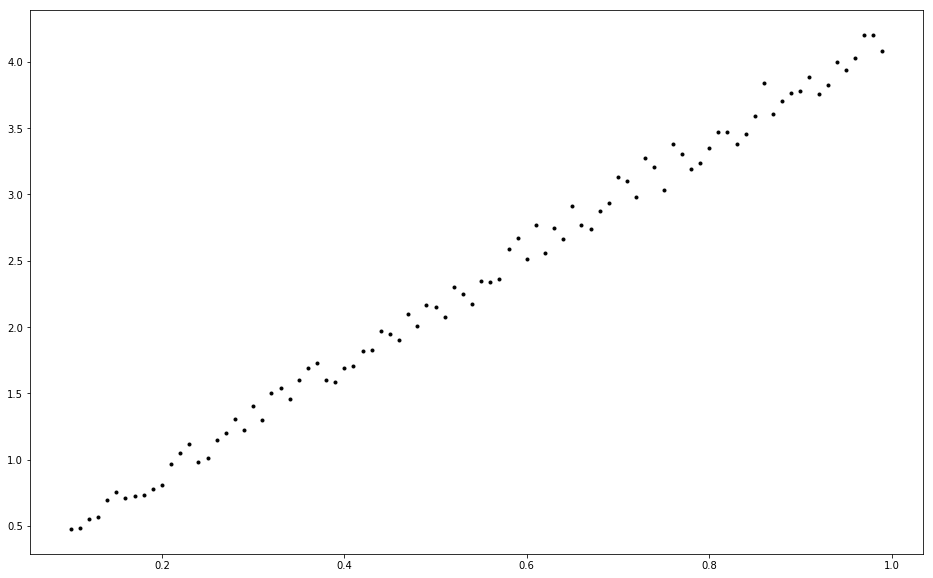

In [ ]:
plt.figure(figsize=(16,10))
#plt.plot(x, Y)
plt.plot(x, Y, '.k')
plt.show()

Definitely the linearity is more pronounced. We will fit the *best* line and see.

In [ ]:
# Linear regression function:
m, c, _, _, _ = stat.linregress(x, Y)

Here, $m$ and $c$ are the slope and intercept of a line. Let us plot this line:

In [ ]:
ylr = m * x + c

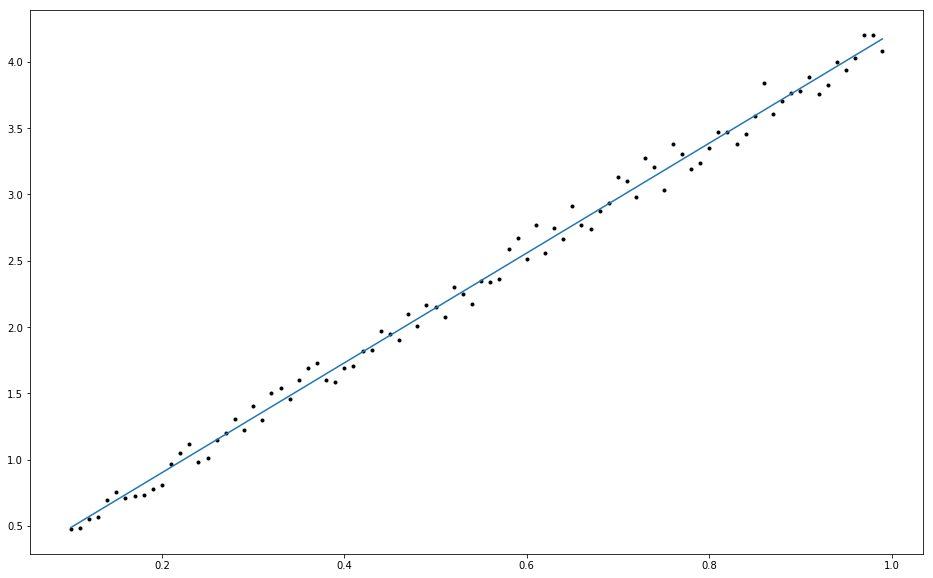

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(x, Y, 'k.')
plt.plot(x, ylr)
plt.show()

We see that this is a good linear fit on the data.

We will plot a few other plausible lines to see visually why this is the *'best'* line.

### Plotting the line between most extreme points:

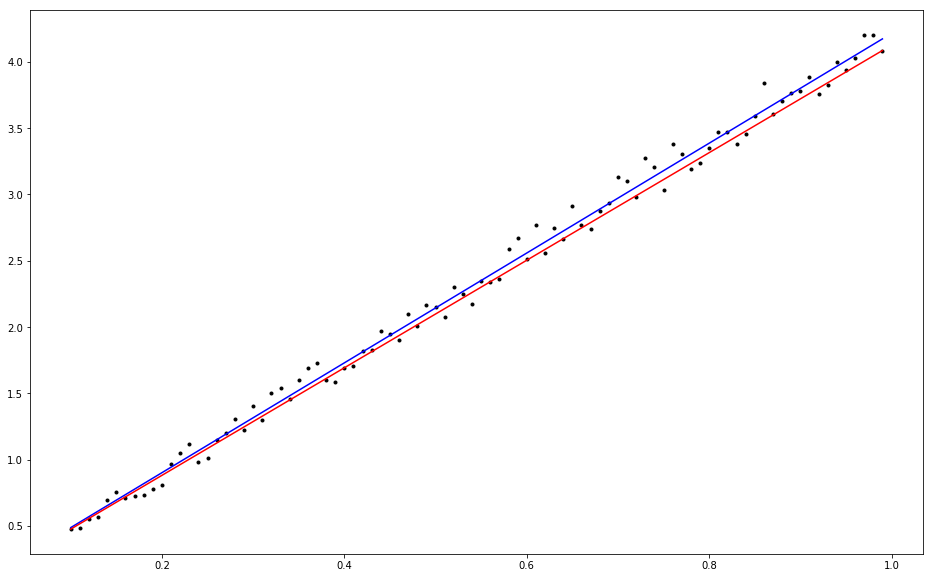

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(x, Y, 'k.')
plt.plot(x, ylr,color='blue')
plt.plot([x[0], x[-1]], [Y[0], Y[-1]],color='red')
plt.show()

### Plotting a line joining any two points:

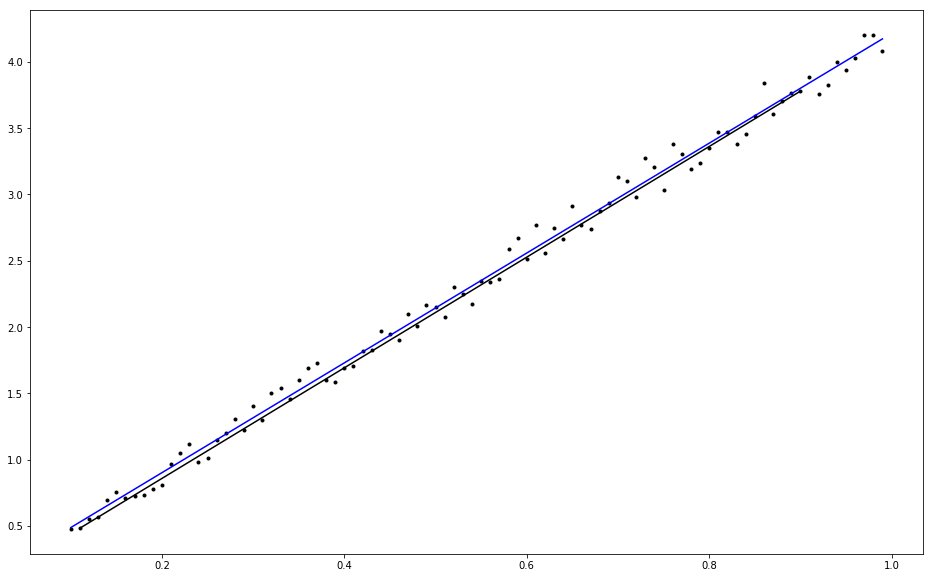

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(x, Y, 'k.')
plt.plot(x, ylr,color='blue')
# plt.plot([x[0], x[-1]], [Y[0], Y[-1]], color='red')
plt.plot([x[1], x[80]], [Y[1], Y[80]], color='black')
plt.show()

## Seeing the effect of outliers

Let us now change the $Y$ value of the first point to see how it changes the best fit line:

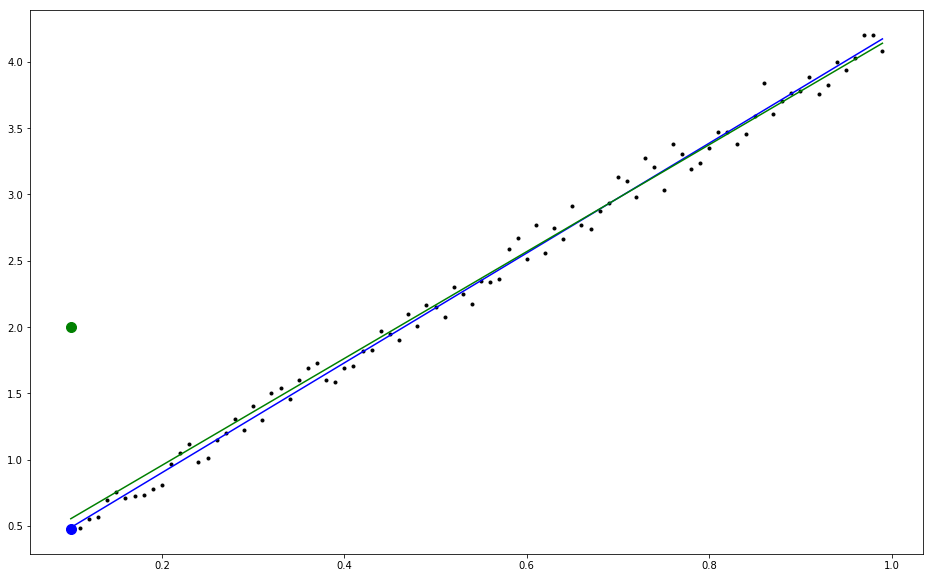

In [ ]:
x1 = np.array(x) # make a copy of all x values
y1 = np.array(Y) # make a copy of all Y values

# Plot the data
plt.figure(figsize=(16,10))
plt.plot(x1, y1, 'k.')

# Plot the original best fit
plt.plot(x, ylr, color='blue')

# MAKE A SMALL CHANGE TO THE Y value of the 0th data point:
y1[0] = 2 # we have made a small change

# Find the new best fit line with the outlier
m1, c1, _, _, _ = stat.linregress(x1, y1)
y1lr = m1 * x1 + c1 

# Plot the new line, and the point before change (BLUE) and after change (GREEN)
plt.plot(x1, y1lr, color='green')
plt.plot(x[0], Y[0], 'bo', markersize=10)
plt.plot(x1[0], y1[0], 'go', markersize=10)
plt.show()

We see that the outlier has skewed the best fit line towards itself!

Change the value of y[0], keeping it between -4.0 to 4.0, and see the effect of errors on the fitted line:

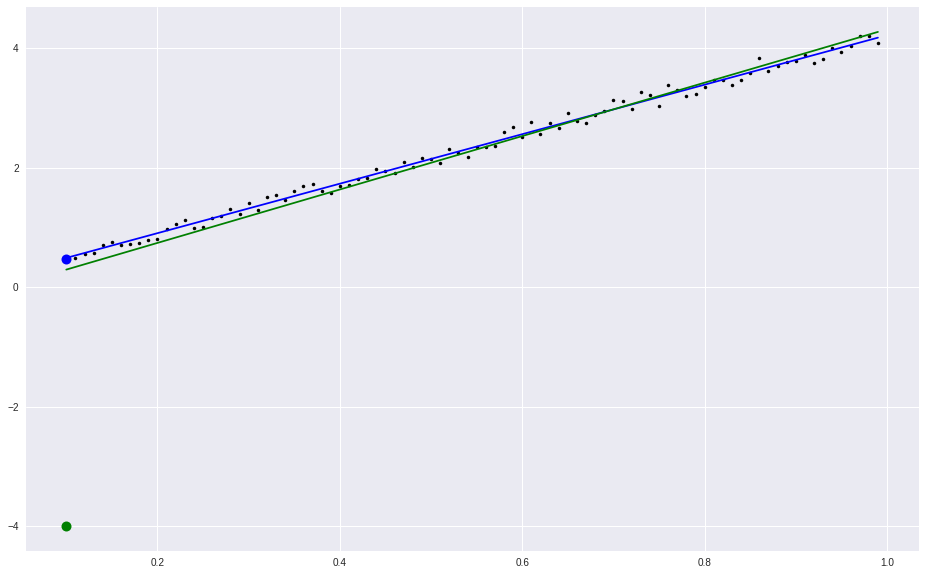

In [ ]:
x1 = np.array(x) # make a copy of all x values
y1 = np.array(Y) # make a copy of all Y values

# Plot the data
plt.figure(figsize=(16,10))
plt.plot(x1, y1, 'k.')

# Plot the original best fit
plt.plot(x, ylr, color='blue')

# MAKE A SMALL CHANGE TO THE Y value of the 0th data point:
y1[0] = -4 # we have made a small change

# Find the new best fit line with the outlier
m1, c1, _, _, _ = stat.linregress(x1, y1)
y1lr = m1 * x1 + c1 

# Plot the new line, and the point before change (BLUE) and after change (GREEN)
plt.plot(x1, y1lr, color='green')
plt.plot(x[0], Y[0], 'bo', markersize=10)
plt.plot(x1[0], y1[0], 'go', markersize=10)
plt.show()

### Let us make two large changes

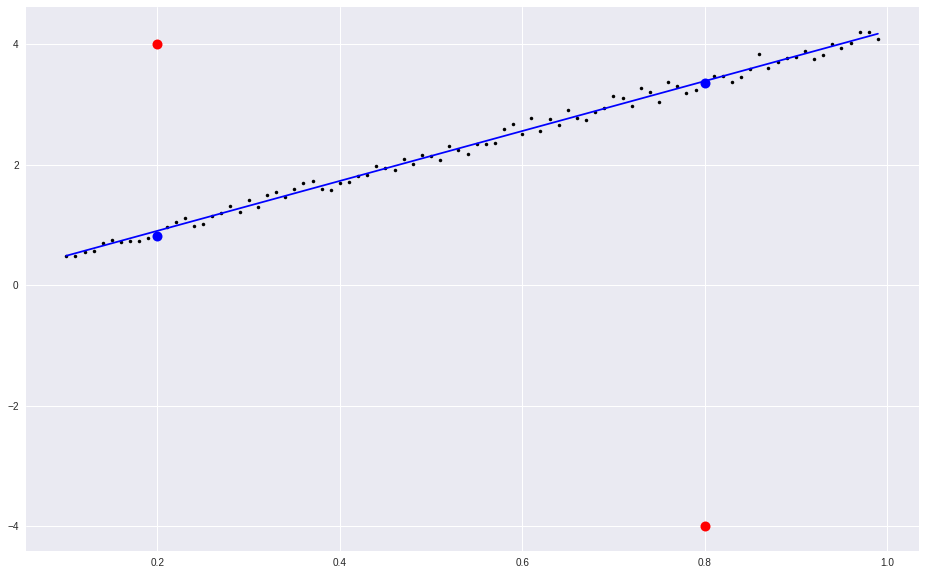

In [ ]:
x2 = np.array(x) # make a copy of all x values
y2 = np.array(Y) # make a copy of all Y values

# Plot the data
plt.figure(figsize=(16,10))
plt.plot(x2, y2, 'k.')

# Plot the original best fit
plt.plot(x, ylr, color='blue')

# MAKE TWO SMALL CHANGES TO THE Y values:
index1 = 10
index2 = 70
y2[index1] = 4
y2[index2] = -4

# Find the new best fit line with the outlier
m2, c2, _, _, _ = stat.linregress(x2, y2)
y2lr = m2 * x2 + c2 

# Plot the new line, and the point before change (BLUE) and after change (GREEN)
# plt.plot(x2, y2lr, color='red')
plt.plot(x[index1], Y[index1], 'bo', markersize=10)
plt.plot(x[index2], Y[index2], 'bo', markersize=10)
plt.plot(x2[index1], y2[index1], 'ro', markersize=10)
plt.plot(x2[index2], y2[index2], 'ro', markersize=10)
plt.show()

Experiment with the indices and values and see the changes to the best fit line.

**Exercise 1** Store only every 10th value and find the best fitting curve for this

In [ ]:
small_x = x[::10]
small_y = y[::10]
sm, sc, _, _, _ = stat.linregress(small_x, small_y)
## Your code here 

**Exercise 2** Replace a data point in the middle, say item 5, with different values and plot the changed lines. Is the effect of noise same as before? Why?

In [ ]:
small_x1 = small_x[:]
small_y1 = small_y[:]
small_y1[4] = small_y1 + ?????
## Your code here